In [20]:
import pandas as pd

In [21]:
df_data6=pd.read_csv('Data6.csv')

In [22]:
df_data6.drop(columns=df_data6.columns[0],inplace=True)
df_data6.loc[df_data6['Class']==1,'Class']=0
df_data6.loc[df_data6['Class']==2,'Class']=1
df_data6

,X1,X2,Class
0,1.388261,2.076096,0
1,2.177247,3.102304,0
2,0.378645,5.307610,0
3,3.681732,1.622681,0
4,2.462861,2.777897,0
...,...,...,...
4091,0.909687,0.375763,1
4092,2.698381,0.511262,1
4093,1.078797,1.526153,1
4094,1.974889,-0.649343,1


SSE model_data5 Data: 20954.866325729727
SSE model_data5 Data: 11775.002373181267
SSE model_data5 Data: 7113.889039954452
SSE model_data5 Data: 5636.744721996469
SSE model_data5 Data: 4525.029088450882
SSE model_data5 Data: 3815.694673431516
SSE model_data5 Data: 3314.699112376844
SSE model_data5 Data: 2973.130196774872
SSE model_data5 Data: 2653.385666999953


C:\Users\aryan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

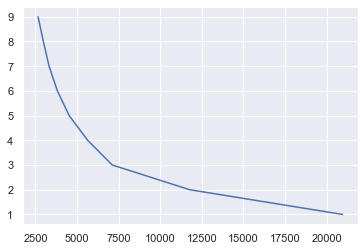

In [23]:
#elbow method
# finding the value of k
from sklearn.cluster import KMeans
ans = []
for i in range(1,10):
    model_data6 = KMeans(n_clusters=i)
    model_data6.fit(df_data6.iloc[:,0:2])
    print('SSE model_data5 Data: '+ str(model_data6.inertia_))
    t = model_data6.inertia_
    ans.append(t)
import seaborn as sns
sns.lineplot(ans,range(1,10))

In [24]:
from sklearn import metrics
for i in range(2,10):
    model_data6 = KMeans(n_clusters=i)
    model_data6.fit(df_data6.iloc[:,0:2])
    print('SHScore Data6: '+str(i)+':'+ str(metrics.silhouette_score(df_data6.iloc[:,0:3], model_data6.labels_)))

SHScore Data6: 2:0.439919279539823
SHScore Data6: 3:0.4408028075440785
SHScore Data6: 4:0.41713933600183467
SHScore Data6: 5:0.3550120692844428
SHScore Data6: 6:0.36620317093860677
SHScore Data6: 7:0.33634178601998244
SHScore Data6: 8:0.3286442358148512
SHScore Data6: 9:0.3229423271975578


In [11]:
#so lets go with 3 then
model_data6 = KMeans(n_clusters=2)
model_data6.fit(df_data6.iloc[:,0:2])
print('SSE model_data6 Data: '+ str(model_data6.inertia_))

SSE model_data6 Data: 11775.002373181267


In [7]:
df_data6.rename(columns = {'X1':'x', 'X2':'y'}, inplace = True)

<AxesSubplot:xlabel='x', ylabel='y'>

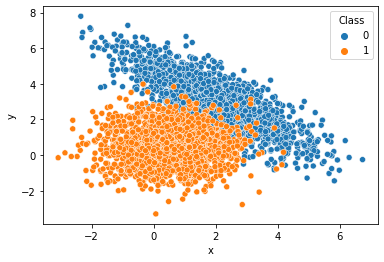

In [8]:
import seaborn as sns
sns.scatterplot(x='x', y='y', data=df_data6, hue='Class')

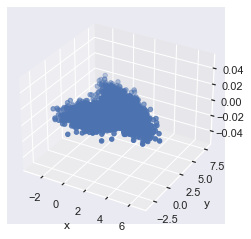

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
sns.set(style = "darkgrid")
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df_data6['x']
y = df_data6['y']
z = df_data6['z']=0

ax.set_xlabel("x")
ax.set_ylabel("y")
#ax.set_zlabel("z")
ax.scatter(x, y, z)
plt.show()

<AxesSubplot:xlabel='x', ylabel='y'>

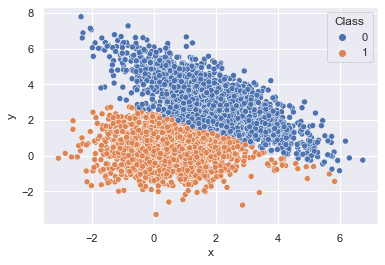

In [12]:
df_data6_predicted=df_data6.iloc[:,0:2]
df_data6_predicted['Class']= model_data6.labels_
sns.scatterplot(x='x', y='y', data=df_data6_predicted, hue='Class')

In [13]:
metrics.cluster.contingency_matrix(df_data6.iloc[:,2], model_data6.labels_)

array([[2002,   46],
       [ 153, 1895]], dtype=int64)

In [15]:
from sklearn.metrics import accuracy_score
print(accuracy_score(df_data6['Class'],model_data6.labels_))

0.951416015625


In [17]:
from sklearn.metrics import f1_score
print(f1_score(df_data6.iloc[:,2], model_data6.labels_))

0.9501128102281274


In [18]:
f1 = (2002)/(2002+0.5*(46+153))

In [19]:
print(f1)

0.952652866999762
